In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np  
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import warnings
warnings.filterwarnings('ignore')

In [22]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [23]:
 training_images, testing_images = training_images/255,testing_images /255

In [24]:
class_names = ['Plane', 'Car','Bird','Cat','Deer','Dog','frog','Horse','Ship','Truck']

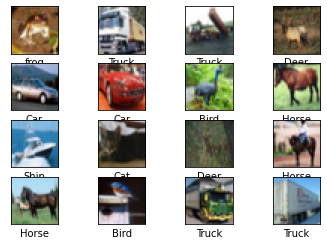

In [25]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
plt.show()

In [26]:
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3))),
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu',))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
          

In [42]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [43]:
model.fit(training_images, training_labels, epochs = 10, validation_data= (testing_images, testing_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2721 - loss: 1.9374 - val_accuracy: 0.4395 - val_loss: 1.5476
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4776 - loss: 1.4416 - val_accuracy: 0.5088 - val_loss: 1.3752
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5446 - loss: 1.2721 - val_accuracy: 0.5555 - val_loss: 1.2521
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5894 - loss: 1.1621 - val_accuracy: 0.5727 - val_loss: 1.1895
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6272 - loss: 1.0556 - val_accuracy: 0.6065 - val_loss: 1.1241
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6600 - loss: 0.9662 - val_accuracy: 0.6438 - val_loss: 1.0264
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6775 - loss: 0.9103 - val_accuracy: 0.6410 - val_loss: 1.0425
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6979 - loss: 0.8494 - val_accu

In [44]:
loss,accuracy = model.evaluate(testing_images, testing_labels)
print(f"loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6473 - loss: 1.0302
loss: 1.0358186960220337
Accuracy: 0.6474999785423279


In [45]:
model.save('image_classifier.model.keras')

In [74]:
# Load the image
img = cv.imread('Plane.jpg')

# Define the new dimensions
new_width, new_height = 32, 32

# Resize the image
reshaped_img = cv.resize(img, (new_width, new_height))

# Convert BGR to RGB for displaying with Matplotlib
reshaped_img_rgb = cv.cvtColor(reshaped_img, cv.COLOR_BGR2RGB)

In [75]:
# Normalize the image and add a batch dimension to match the input shape expected by the model
input_img = np.expand_dims(reshaped_img_rgb / 255.0, axis=0)  # Shape: (1, 32, 32, 3)

# Make a prediction
prediction = model.predict(input_img)

# Get the index of the class with the highest probability
index = np.argmax(prediction)

# Assuming you have a list of class names corresponding to your model's output layer
print(f'Prediction is {class_names[index]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction is Plane
